# Modelo Avaliação

In [68]:
# pipenv install scikit-learn scipy pandas matplotlib seaborn ipykernel gradio statsmodels pingouin
"""Lista de Importação de todos os módulos que serão utilizado no notebook"""

# AED
import pandas as pd


import seaborn as sns


import matplotlib.pyplot as plt



# Model Trainning

from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression


from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder


from sklearn.compose import ColumnTransformer


from sklearn.pipeline import Pipeline


from sklearn.impute import SimpleImputer


from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

import numpy as np



# Model Validation


from scipy.stats import zscore, shapiro, kstest, anderson


from statsmodels.stats.diagnostic import lilliefors, het_goldfeldquandt


import pingouin as pg



# Model Prediction


import joblib

# AED

#### Carga do Dados



Nesta etapa, foi destacada a importância de utilizar nomes de colunas técnicos em um DataFrame, facilitando a referência e evitando problemas com acentuação, maiúsculas e minúsculas. As colunas foram renomeadas utilizando o atributo "columns" do DataFrame, atribuindo uma lista com os novos nomes. Também foi aplicado o conceito de Bucketing, transformando variáveis numéricas em categóricas para análises específicas. Para isso, cópias do DataFrame original foram criadas para realizar a análise exploratória e o Bucketing, mantendo o DataFrame original intacto para o treinamento do modelo.


In [69]:
# carregar o dataset
df_avaliacao = pd.read_csv("./datasets/Student_Performance.csv")
df_avaliacao.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 6 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Hours Studied                     10000 non-null  int64  
 1   Previous Scores                   10000 non-null  int64  
 2   Extracurricular Activities        10000 non-null  object 
 3   Sleep Hours                       10000 non-null  int64  
 4   Sample Question Papers Practiced  10000 non-null  int64  
 5   Performance Index                 10000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 468.9+ KB


In [70]:
df_avaliacao.head(3)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0


In [71]:
# renomear colunas
df_avaliacao.columns = [
    "horas_estudadas",
    "pontuacao_anterior",
    "atividades_extracurriculares",
    "horas_sono",
    "simulados_resolvidos",
    "pontuacao_avaliacao"
]

In [72]:
df_avaliacao.head(3)

,horas_estudadas,pontuacao_anterior,atividades_extracurriculares,horas_sono,simulados_resolvidos,pontuacao_avaliacao
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0


In [73]:
# copiar DF para DF AED
df_avaliacao_eda = df_avaliacao.copy()
df_avaliacao_eda.head(2)

,horas_estudadas,pontuacao_anterior,atividades_extracurriculares,horas_sono,simulados_resolvidos,pontuacao_avaliacao
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0


In [74]:
# copiar DF para DF AED
df_avaliacao_bucketing = df_avaliacao.copy()
df_avaliacao_bucketing.head(2)

,horas_estudadas,pontuacao_anterior,atividades_extracurriculares,horas_sono,simulados_resolvidos,pontuacao_avaliacao
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0


In [75]:
# detectar quantidade valores ausentes (nulos) por coluna
df_avaliacao_eda.isna().sum()

horas_estudadas                 0
pontuacao_anterior              0
atividades_extracurriculares    0
horas_sono                      0
simulados_resolvidos            0
pontuacao_avaliacao             0
dtype: int64

In [76]:
# medidas estatísticas do DataFrame
df_colesterol_eda.describe()

,horas_estudadas,pontuacao_anterior,horas_sono,simulados_resolvidos,pontuacao_avaliacao
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


#### Tratamento de Outliers



<Axes: xlabel='horas_estudadas'>

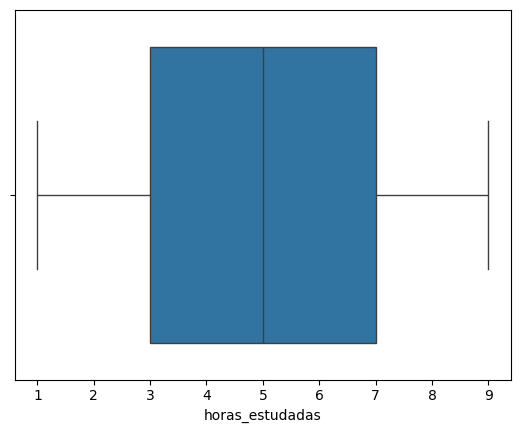

In [77]:
# verificar / detectar outliers 
sns.boxplot(data=df_avaliacao_eda, x="horas_estudadas")

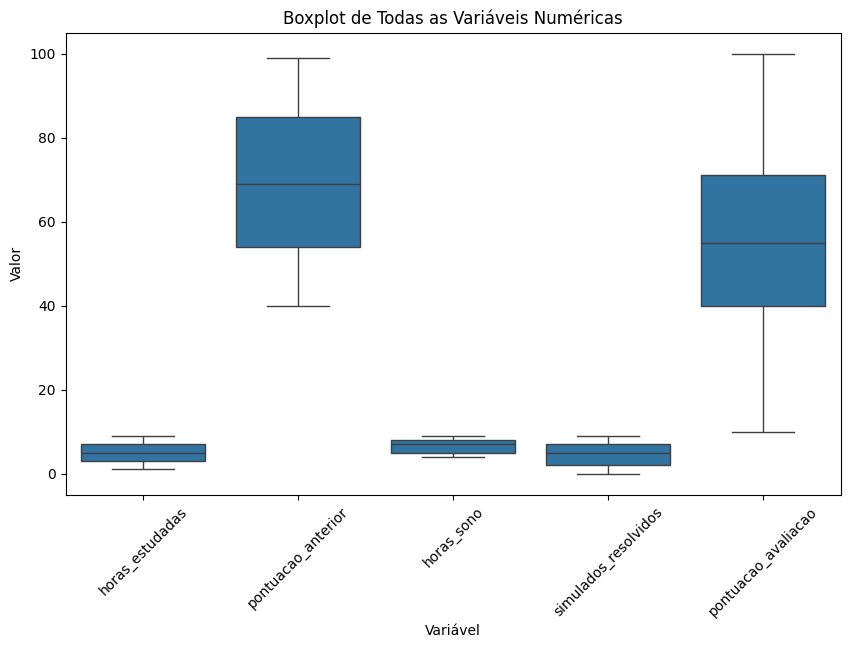

In [78]:


# Selecionar apenas as colunas numéricas
df_numerico = df_avaliacao_eda.select_dtypes(include="number")

# Transformar o DataFrame numérico para o formato longo
df_long = df_numerico.melt(var_name="Variável", value_name="Valor")

# Criar o boxplot para todas as variáveis numéricas
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_long, x="Variável", y="Valor")
plt.xticks(rotation=45)  # Rotacionar os nomes das variáveis para melhor visualização
plt.title("Boxplot de Todas as Variáveis Numéricas")
plt.show()


<Axes: xlabel='atividades_extracurriculares', ylabel='pontuacao_avaliacao'>

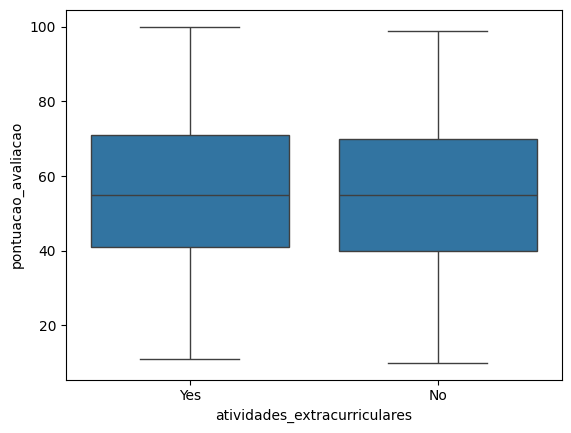

In [79]:
# cruzamento de variáveis categoricas - pontuacao_avaliacao
sns.boxplot(data=df_avaliacao_eda, x="atividades_extracurriculares", y="pontuacao_avaliacao")

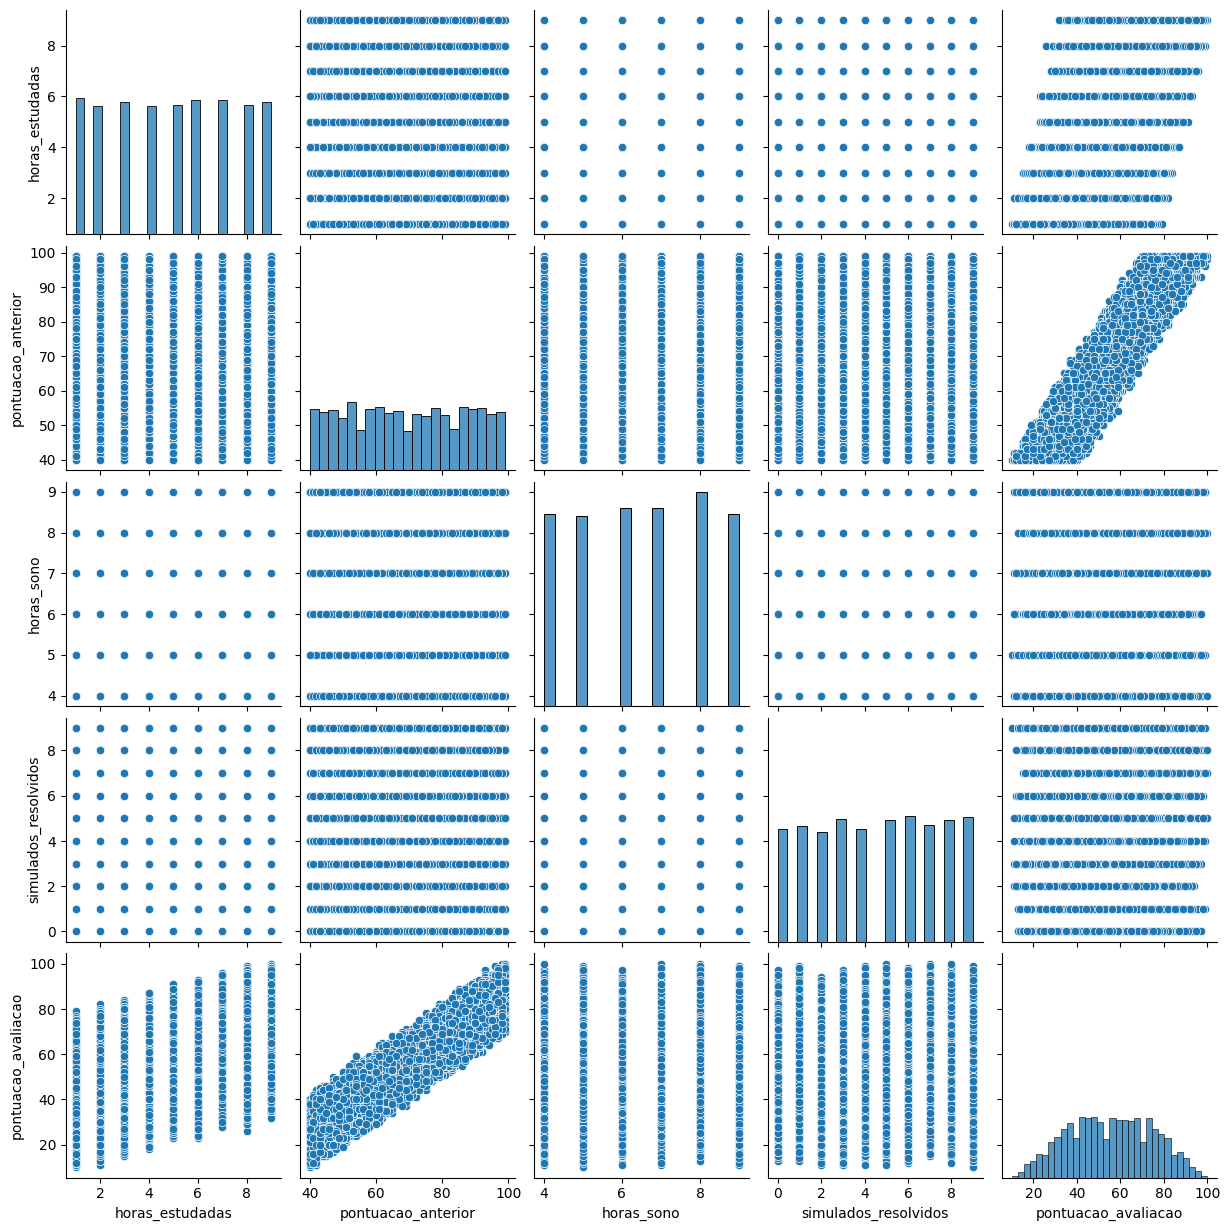

In [80]:
# cruzamento de todas as variáveis numéricas - modo rápido
sns.pairplot(df_avaliacao_eda)

Após fazer a análise, chego a conclusão de que não existem outliers nesse database e ele está pronto para a próxima etapa.

#### Análise de Correlação



In [81]:
# converter variáveis categóricas nominais em numéricas usando One-Hot Enconder do Pandas
df_avaliacao_eda = pd.get_dummies(
    df_avaliacao_eda, columns=["atividades_extracurriculares"], dtype="int64"
)

In [82]:
df_avaliacao_eda.head(5)

,horas_estudadas,pontuacao_anterior,horas_sono,simulados_resolvidos,pontuacao_avaliacao,atividades_extracurriculares_No,atividades_extracurriculares_Yes
0,7,99,9,1,91.0,0,1
1,4,82,4,2,65.0,1,0
2,8,51,7,2,45.0,0,1
3,5,52,5,2,36.0,0,1
4,7,75,8,5,66.0,1,0


<Axes: >

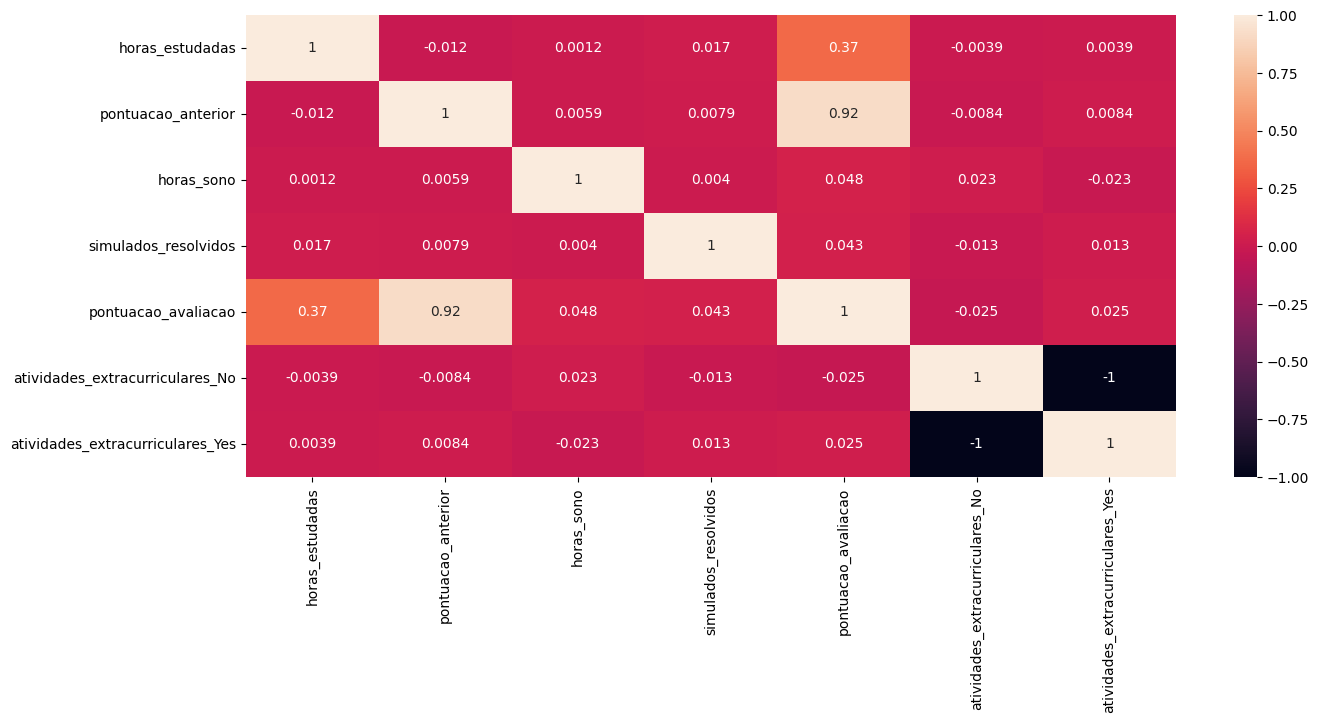

In [83]:
# mapa de calor com correlação entre variáveis
plt.figure(figsize=(15, 6))
sns.heatmap(df_avaliacao_eda.corr(), vmin=-1, vmax=1, annot=True)

# Podemos observar que um dos fatores que mais impacta na pontuacao_avaliacao é a pontuacao anterior e as horas estudadas.

<Axes: >

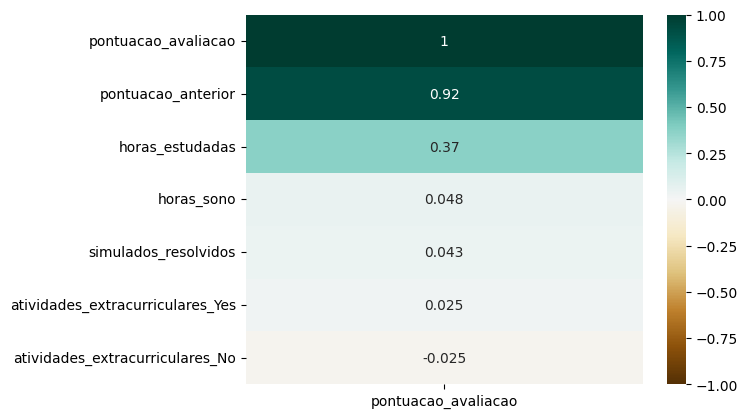

In [84]:
# formato de ranking, somente correlação com a variável target (nível correlação)
sns.heatmap(
    df_avaliacao_eda.corr()[["pontuacao_avaliacao"]].sort_values(
        by="pontuacao_avaliacao", ascending=False
    ),
    vmin=-1,
    vmax=1,
    annot=True,
    cmap="BrBG",
)

#### Análise Gráfica com Bucketing



In [85]:
# Bucketing - pontuacao_anteior
bins_pontuacao_anterior = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
labels_pontuacao_anterior = ["10-19", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89", "90-99"]
df_avaliacao_bucketing["escala_pontuacao_anterior"] = pd.cut(
    x=df_avaliacao_bucketing["pontuacao_anterior"],
    bins=bins_pontuacao_anterior,
    labels=labels_pontuacao_anterior,
    include_lowest=True,
)
df_avaliacao_bucketing.head(5)

,horas_estudadas,pontuacao_anterior,atividades_extracurriculares,horas_sono,simulados_resolvidos,pontuacao_avaliacao,escala_pontuacao_anterior
0,7,99,Yes,9,1,91.0,90-99
1,4,82,No,4,2,65.0,80-89
2,8,51,Yes,7,2,45.0,50-59
3,5,52,Yes,5,2,36.0,50-59
4,7,75,No,8,5,66.0,70-79


<Axes: xlabel='escala_pontuacao_anterior', ylabel='pontuacao_avaliacao'>

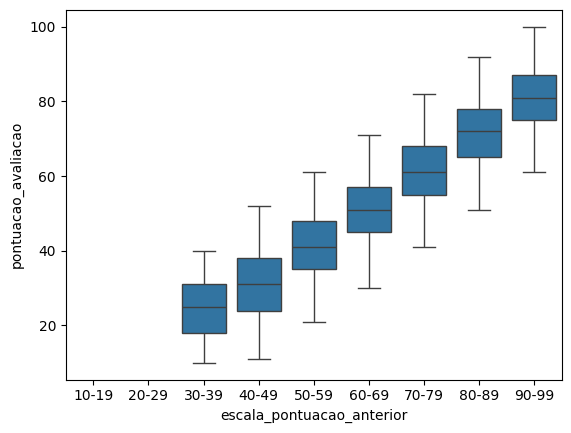

In [86]:
# Boxplot comparando pontuacao anterior com pontuacao da avaliacao atual
sns.boxplot(df_avaliacao_bucketing, x="escala_pontuacao_anterior", y="pontuacao_avaliacao")

Concluímos que não há outliers ao comparar a pontuação anterior com a pontuação atual da avaliação. Em outras palavras, ninguém com uma pontuação muito baixa anteriormente alcançou uma pontuação muito alta, e vice-versa.

### Preparação do Dataset para Treinamento



#### Split do Dataset Treino e Teste



In [87]:
# Criar dataset e treino de teste - remover principais outliers
#df_avaliacao.drop(
  # Não temos outlier nesse dataset
#)
#df_colesterol.info()

In [88]:
# definir variáveis de treino - independentes e dependente
X = df_avaliacao.drop(columns="pontuacao_avaliacao", axis=1)
Y = df_avaliacao["pontuacao_avaliacao"]

In [89]:
# Split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.30, random_state=54
)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(7000, 5) (3000, 5) (7000,) (3000,)


#### Transformação de Variáveis Categóricas para o Modelo



In [90]:
# PIPELINE
# Padronizar variáveis numéricas - 	horas_estudadas, pontuacao_anterior, horas_sono, simulados_resolvidos
# OneHotEncoder - variáveis categóricas nominais - atividades_extracurriculares

# Nome das colunas
colunas_categoricas = ["atividades_extracurriculares"]
colunas_numericas = ["horas_estudadas", "pontuacao_anterior", "horas_sono", "simulados_resolvidos"]

In [91]:
# Transformer Categóricas
transformer_categorias = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)

In [92]:
# Transformer Numéricas
transformer_numericas = Pipeline(
    steps=[
        ("scaler", StandardScaler()),
    ]
)

In [93]:
# Criar um ColumnTransformer que encapsula todas as transformações
preprocessor = ColumnTransformer(
    transformers=[
        ("num", transformer_numericas, colunas_numericas),
        ("cat", transformer_categorias, colunas_categoricas),
    ]
)

### Treinamento do Modelo com Pipelines



Foi desenvolvido um Pipeline principal para pré-processar os dados e treinar um modelo de regressão linear. A estrutura inclui dois passos: o pré-processamento, que ajusta as colunas ao formato necessário, e o treinamento do modelo. Utilizou-se o objeto Pipeline para integrar essas etapas. O treinamento foi realizado com o método fit, aplicando todo o fluxo, desde o pré-processamento até a regressão linear. A estrutura do Pipeline foi visualizada, e as métricas do modelo treinado foram analisadas.



In [94]:
# criar o pipeline principal - preprocessamento + treinamento
model_regr = Pipeline(
    steps=[("preprocessor", preprocessor), ("regressor", LinearRegression())]
)

In [95]:
# treinar modelo
model_regr.fit(X_train, Y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['horas_estudadas',
                                                   'pontuacao_anterior',
                                                   'horas_sono',
                                                   'simulados_resolvidos']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['atividades_extracurriculares'])])),
                ('regressor', LinearRegression())])

### Validação do Modelo



#### Análise de Métricas



In [96]:
# gerar predição
Y_pred = model_regr.predict(X_test)

In [97]:
# calcular r2_score - quanto mais próximo de 1, melhor
r2_score(Y_test, Y_pred)
# pelo índice, temos um bom modelo

0.9889096025109592

In [99]:
# calcular predição de erro do modelo
# MAE (mean_absolute_error)
# o valor apresenta a mesma unidade da variável dependente
print(f"{mean_absolute_error(Y_test, Y_pred):.2f} de pontuação, para mais ou para menos")
# Para mim, é uma faixa muito baixa de variância, então podemos considerar o modelo como bom.

1.61 de pontuação, para mais ou para menos


In [100]:
# calcular RMSE (root mean absolute error)
# outliers evidenciam a diferença com o resultado do índice anterior (MAE)
mse = mean_squared_error(Y_test, Y_pred)
rmse = np.sqrt(mse)
print("RMSE:", rmse)

RMSE: 2.0313703576174515


#### Análise Gráfica de Resíduos



A análise dos resíduos do modelo de regressão foi realizada, começando pelo cálculo e padronização dos resíduos. Em seguida, foi gerado um gráfico de dispersão utilizando o Seaborn para verificar a linearidade e a homoscedasticidade, avaliando se os pontos se distribuem próximos a uma reta de 45° e dentro da banda de segurança. Além disso, testes estatísticos foram aplicados para verificar se os resíduos seguem uma distribuição normal, complementados por um gráfico QQ-Plot, criado com o módulo Penguin, para validar a normalidade dos resíduos de forma visual.



In [101]:
# calcular resíduos
residuos = Y_test - Y_pred
print(residuos.dtype)

float64


In [102]:
# transformar resíduos na escala padrão
# (X - média) / desvio padrão
residuos_std = zscore(residuos)
print(residuos_std.dtype)

float64


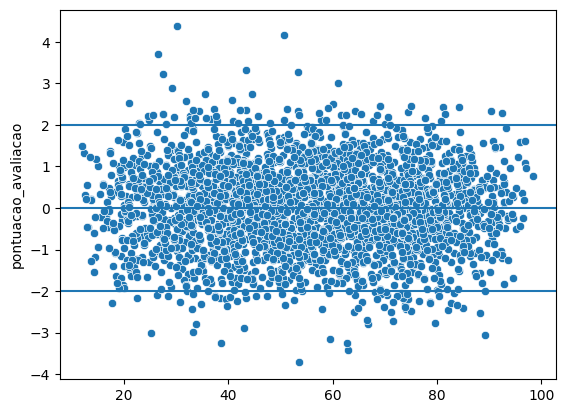

In [103]:
# verificar linearidade dos resíduos: valores entre -2 e +2 (escala padrão)
# verificar homocedasticidade - bem ditribuidos
sns.scatterplot(x=Y_pred, y=residuos_std)
plt.axhline(y=0)
plt.axhline(y=-2)
plt.axhline(y=2)

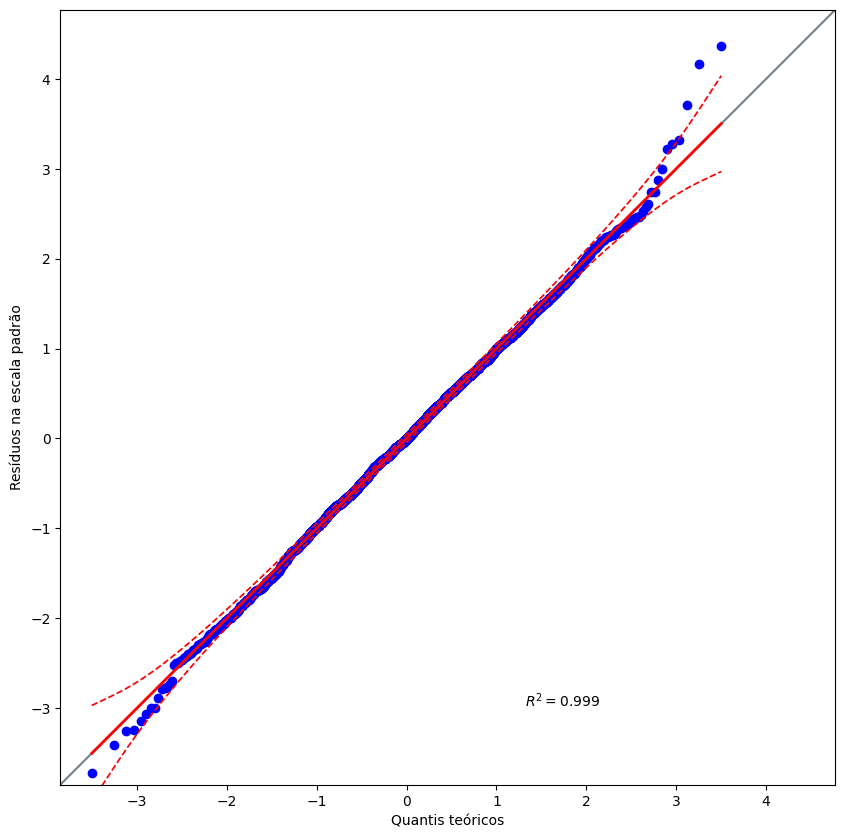

In [104]:
# checar se resíduos seguem uma distribuição normal
# QQ Plot
plt.figure(figsize=(10, 12))
pg.qqplot(residuos_std, dist="norm", confidence=0.95)
plt.xlabel("Quantis teóricos")
plt.ylabel("Resíduos na escala padrão")
plt.show()

#### Teste de Normalidade dos Resíduos



A análise de normalidade dos resíduos foi realizada utilizando quatro testes estatísticos: Shapiro-Wilk, Kolmogorov-Smirnov, Lilliefors e Anderson-Darling. Inicialmente, importamos os módulos necessários do SciPy e StatsModels. No teste de Shapiro-Wilk, observamos a estatística do teste e o valor P, com um valor P menor que 0.005 indicando a rejeição da hipótese nula de normalidade. O teste de Kolmogorov-Smirnov também apontou a falta de normalidade. Em contrapartida, o teste de Lilliefors sugeriu normalidade nos resíduos. Por fim, o teste de Anderson-Darling foi realizado, comparando a estatística do teste com valores críticos em diferentes níveis de significância. A conclusão geral foi que três dos quatro testes indicaram a ausência de normalidade nos resíduos, destacando a importância de considerar esses resultados ao avaliar o modelo.


In [105]:
# teste de normalidade de Shapiro-Wilk
stat_shapiro, p_value_shapiro = shapiro(residuos)
print(
    "Estatística do Teste: {:.6f} e P-Value: {:.6f}".format(
        stat_shapiro, p_value_shapiro
    )
)
# rejeitar hipótese nula se P-Value < 0.005

# A hipótese nula não pode ser rejeitada, pois P-Value é maior que 0,05. Portanto, com a estatística do teste, conclui-se que o modelo segue uma distribuição normal. 
# 0.998899: Valores próximos de 1 no Shapiro-Wilk indicam alta correspondência com uma distribuição normal.

Estatística do Teste: 0.998899 e P-Value: 0.050671


In [111]:
# teste de Kolmogorov - Smirnov
stat_ks, p_value_ks = kstest(residuos, "norm")
print(
    "Estatística do Teste: {:.6f} e P-Value: {:.06f}".format(stat_ks, p_value_ks))
# Aqui, rejeitamos a hipótese nula - P-Value < 0.005, ou seja, segundo este teste, o modelo não segue uma distribuição normal.

Estatística do Teste: 0.175964 e P-Value: 0.000000


In [107]:
# teste de Lilliefors
stat_ll, p_value_ll = lilliefors(residuos, dist="norm", pvalmethod="table")
print(
    "Estatística do Teste: {:.6f} e P-Value: {:.6f}".format(stat_ll, p_value_ll))
# A hipótese nula não pode ser rejeitada, pois P-Value é maior que 0,05. Portanto, com a estatística do teste, conclui-se que o modelo segue uma distribuição normal. 
# 0.013891: Um valor baixo indica que os dados estão próximos da normalidade no teste de Lilliefors, e a decisão depende do p-value.

Estatística do Teste: 0.013891 e P-Value: 0.191082


In [112]:
# teste de Anderson-Darling
stat_and, critical_and, significance_and = anderson(residuos, dist="norm")
print(
    "Estatística do Teste: {:.6f} e Valor Crítico: {:.6f}".format(
        stat_and, critical_and[2]
    )
)
# Se a estatística do teste for menor que o valor crítico, não rejeitamos a hipótese nula (os dados seguem uma distribuição normal).
# Se a estatística do teste for maior que o valor crítico, rejeitamos a hipótese nula (os dados não seguem uma distribuição normal).

# Nesse caso, os resíduos seguem uma distribuição normal



Estatística do Teste: 0.462566 e Valor Crítico: 0.786000


#### Teste de Homocedasticidade dos Resíduos



In [115]:
# Teste de Homocedasticidade de Goldfeld-Quandt
pipe = Pipeline(steps=[("preprocessor", preprocessor)])
X_test_transformed = pipe.fit_transform(X_test)

test_goldfeld = het_goldfeldquandt(residuos, X_test_transformed)
stat_goldfeld, p_value_goldfeld = test_goldfeld[0], test_goldfeld[1]
print(
    "Estatística do Teste: {:.6f} e P-Value: {:.6f}".format(
        stat_goldfeld, p_value_goldfeld
    )
)

# Interpretação do Resultado:
# P-Value (0.552199):

# O p-value é significativamente maior que 0,05 (o nível de significância comum), o que significa que não rejeitamos a hipótese nula.
# Isso sugere que os resíduos são homocedásticos, ou seja, a variância dos resíduos é constante. Não há evidências suficientes para afirmar que a variância dos resíduos varia ao longo das observações.
# Estatística do Teste (0.993232):
# A estatística de Goldfeld-Quandt compara as variâncias dos resíduos em dois subconjuntos de dados. Com esse valor, observa-se que não há diferença significativa nas variâncias entre os subconjuntos.

Estatística do Teste: 0.993232 e P-Value: 0.552199


### Predição de Valores



In [125]:
# definir valores aleatórios para exemplo de predição
prediction_random_values = {
    "horas_estudadas": 15,
    "pontuacao_anterior": 80,
    "atividades_extracurriculares": "Sim",
    "horas_sono": 7,
    "simulados_resolvidos": 3,
}
sample_df = pd.DataFrame(prediction_random_values, index=[1])
sample_df

,horas_estudadas,pontuacao_anterior,atividades_extracurriculares,horas_sono,simulados_resolvidos
1,15,80,Sim,7,3


In [126]:
# calcular predição
model_regr.predict(sample_df)

array([94.57480077])

In [127]:
# salvar modelo
joblib.dump(model_regr, "./modelo_avaliacao.plk")

['./modelo_avaliacao.plk']